In [ ]:
import numpy as np

In [ ]:
from PIL import Image

In [ ]:
#https://www.immersivelimit.com/tutorials/create-bounding-box-from-segmentation

In [ ]:
img = np.array(Image.open('hela_SAM.png').convert("L"), dtype=np.float32)

In [ ]:
_, binary_image = cv2.threshold(img, 100, 105, cv2.THRESH_BINARY)

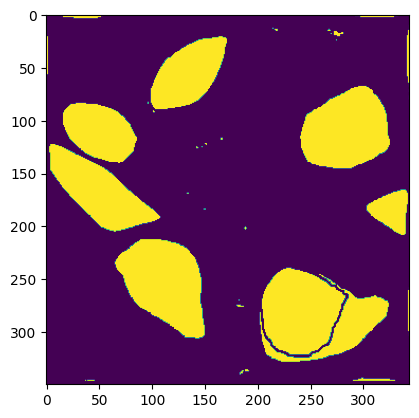

In [ ]:
plt.imshow(binary_image)

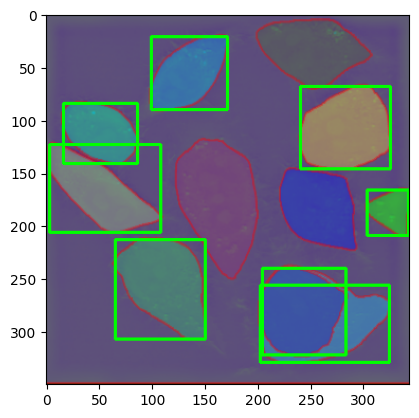

In [ ]:
analysis = (binary_image * 255).astype(np.uint8)
analysis = cv2.connectedComponentsWithStats(analysis, 4,cv2.CV_32S)
num_labels, labels, stats, centroids = analysis

# Iterate through each connected component
for label in range(1, num_labels):
    # Extract the region of interest (ROI) for the component
    x, y, width, height, area = stats[label]
    roi = binary_image[y:y+height, x:x+width]

    # Perform further analysis or processing on the component
    # Example: Calculate centroid
    centroid_x, centroid_y = centroids[label]

    if area > 450:
      cv2.rectangle(mask, (x, y), (x+width, y+height), (0, 255, 0), 2)

    # Example: Draw bounding box


# Display the resulting image
plt.imshow(mask)






In [ ]:
img2 = torch.tensor(img)
torch.unique(img2)

tensor([ 38.,  39.,  40.,  41.,  42.,  49.,  51.,  52.,  55.,  56.,  57.,  58.,
         59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,
         71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,
         83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,
         95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106.,
        107., 108., 109., 110., 111., 112., 113., 114., 115., 116., 117., 118.,
        119., 120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130.,
        131., 132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 143.,
        144., 145., 146., 150., 152., 154., 161., 162.])

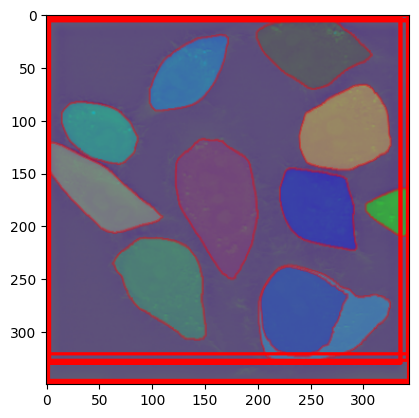

In [ ]:
bboxs = []
for color in distinct_colors:
  segmentation = np.where(mask == color)

  #get the color of each segmentation, can find mins and maxs and draw all colors
  #if there wasn't blotches, you could just get all the uique colors and
  #fo each of those
  # Bounding Box
  bbox = 0, 0, 0, 0
  if len(segmentation) != 0 and len(segmentation[1]) != 0 and len(segmentation[0]) != 0:
      x_min = int(np.min(segmentation[1]))
      x_max = int(np.max(segmentation[1]))
      y_min = int(np.min(segmentation[0]))
      y_max = int(np.max(segmentation[0]))

      bbox = ((x_min,  y_min), (x_max, y_max))
      bboxs.append(bbox)


from torchvision.utils import draw_bounding_boxes
color = (255, 0, 0)



# Line thickness of 2 px
for ((x_min,  y_min), (x_max, y_max)) in bboxs:

  thickness = 2
  image = cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, thickness)
plt.imshow(image)

In [ ]:
bboxs

[((2, 5), (342, 348))]

In [ ]:
segmentation = np.where(mask == 255)
#get the color of each segmentation, can find mins and maxs and draw all colors
#if there wasn't blotches, you could just get all the uique colors and
#fo each of those
# Bounding Box
bbox = 0, 0, 0, 0
if len(segmentation) != 0 and len(segmentation[1]) != 0 and len(segmentation[0]) != 0:
    x_min = int(np.min(segmentation[1]))
    x_max = int(np.max(segmentation[1]))
    y_min = int(np.min(segmentation[0]))
    y_max = int(np.max(segmentation[0]))

    bbox = x_min, x_max, y_min, y_max

(1024, 1024, 3)

In [ ]:
print(x_min, x_max, y_min, y_max)

0 1023 61 470


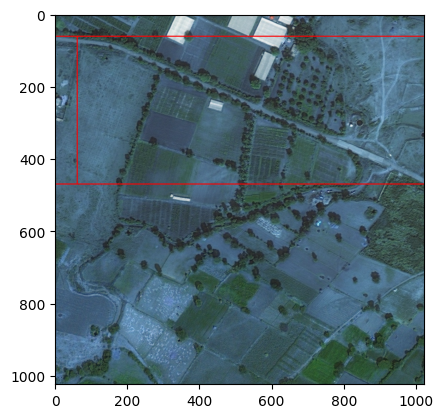

In [ ]:
from torchvision.utils import draw_bounding_boxes
color = (255, 0, 0)



# Line thickness of 2 px
thickness = 2
image = cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, thickness)
plt.imshow(image)

In [ ]:
from torchvision.io import read_image
import torchvision.transforms as transforms
import cv2

img_path = "hela.png"
mask_path =  "hela_SAM.png"
img = cv2.imread(img_path)
mask = cv2.imread(mask_path)

mask = cv2.cvtColor(mask, cv2.COLOR_BGRA2BGR)
cv2.imwrite('hela_SAM.png', mask)

img = cv2.resize(img, (344, 350), interpolation=cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
cv2.imwrite('hela.png', img)
mask = read_image(mask_path)
img = read_image(img_path)
# Define transform
transform = transforms.Grayscale()

# Convert the image to grayscale
mask = transform(mask)